<a href="https://colab.research.google.com/github/dphi-official/Machine_Learning_Bootcamp/blob/master/Hyperparameter_Tuning_and_Model_Evaluation/Hyperparameter_Tuning_and_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agenda**
*  Objective
*  About the Dataset
*  Loading Libraries
*  Loading Data
*  Basic EDA
*  Basic Pre-processing
*  Separating Input and Output Vairables
*  Splitting data into Train and Validation set
*  Building Model: RandomForestClassifer
*  Improve Model


## **Objective**
The objective is to know if a patient has liver disease or not.

## About the Dataset

**Context**

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

**Content**

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

**Columns:**

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  liver_disease: field used to split the data into two sets (patient with liver disease, or no disease). 1 --> Have liver disease, 0 --> No liver disease


The dataset is available at UCI Machine Learning Repository, Kaggle and DPhi official GitHub page.

**Dataset Link:** https://github.com/dphi-official/Datasets/blob/master/liver_patient.csv

**GitHub raw data link:** https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient.csv

## **Loading Libraries**
All Python capabilities are not loaded to our working environment by default (even they are already installed in your system). So, we import each and every library that we want to use.

In data science, numpy and pandas are most commonly used libraries. Numpy is required for calculations like means, medians, square roots, etc. Pandas is used for data processing and data frames. Matplotlib is used for data visualization. We chose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd, matplotlib.pyplot as plt).

**You can load/import all the libraries at one place that you think might be required or can import whenever needed.**

In [ ]:
import pandas as pd       # to read data
import numpy as np        # to perform calculations 
import matplotlib.pyplot as plt # to visualise

## **Loading the Data**
Pandas module is used for reading data of different formats. However, we have used here read_csv() function to read the data as our data is in comma separated format (CSV).

In [ ]:
# In read_csv() function, we have passed the location to where the file is located at dphi official github page
liver_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient.csv" )

## **Basis Exploratory Data Analysis (EDA)**
Let's check how our data looks. This can be done using head() method.

In [ ]:
liver_data.head()       # head() returns you the first five rows of the data. Similarly, you can use tail() to get last 5 rows of data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
# Columns/Attributes
liver_data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'liver_disease'],
      dtype='object')

In [ ]:
# concise summary about dataset
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  liver_disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


*  There are 583 non-null values in each of the columns except **Albumin_and_Globulin_Ratio**. This column has only 579 non-null values i.e. there are 4 missing/null values.

*  All the columns are numerical, i.e. the data types are either int or float except **Gender**. Gender has all the values as object either 'Male' or 'Female'

Taking a look at the count of patient who has liver disease and that who don't have liver disease. This can be achieved by a method called 'value_counts()'.

In [ ]:
liver_data.liver_disease.value_counts()

1    416
0    167
Name: liver_disease, dtype: int64

In [ ]:
liver_data.Gender.value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

Out of 583 patients, 416 have liver disease while 167 don't.

In [ ]:
# Taking a look at missing values in column Albumin_and_Globulin_Ratio
liver_data[liver_data['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,0


Since the column **Albumin_and_Globulin_Ratio** has continuous values, we can fill the missing values here with the mean value of this particular column.

In [ ]:
# filling the missing values
liver_data.Albumin_and_Globulin_Ratio.fillna(liver_data['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

## **Basic Pre-processing**

**Converting the categorical values of Gender column to Numerical**

*Why do we need to do this?*

All the machine learning models only accepts numerical values. They work only on numbers. If you pass any categorical value in any machine learning model, it will throw an error. Don't believe it. Well as a data scientist, we should always do experiments. Try giving the categorical value to any model and observe the result.

We can achieve this by one hot encoding.

In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. In Python there is a class 'OneHotEncoder' in 'sklearn.preprocessing' to do this task, but here we will use pandas function 'get_dummies()'. This get_dummies() does the same work as done by 'OneHotEncoder' form sklearn.preprocessing.

![alt text](https://dphi.tech/blog/wp-content/uploads/2020/06/ohe.png)

In [ ]:
liver_data = pd.get_dummies(liver_data, columns=['Gender'])

In [ ]:
liver_data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


## **Separating Input Features and Output Features**
Before building any machine learning model, we always separate the input variables and output variables. Input variables are those quantities whose values are changed naturally in an experiment, whereas output variable is the one whose values are dependent on the input variables. So, input variables are also known as independent variables as its values are not dependent on any other quantity, and output variable/s are also known as dependent variables as its values are dependent on other variable i.e. input variables. Like here in this data, we are trying to predict the price if a patient has liver disease or not i.e. 'Dataset' variable. Sot 'Dataset' variable is our dependent variable.

By convention input variables are represented with 'X' and output variables are represented with 'y'.

In [ ]:
X = liver_data.drop('liver_disease', axis = 1)              # Input Variables/features
y = liver_data.liver_disease                                # output variables/features

## **Splitting the data**
We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.

We split 80% of the data to the training set while 20% of the data to test set using below code. The test_size variable is where we actually specify the proportion of the test set.

By passing our X and y variables into the train_test_split method, we are able to capture the splits in data by assigning 4 variables to the result.

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split 

# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,stratify=y)

X_train: independent/input feature data for training the model

y_train: dependent/output feature data for training the model

 X_test: independent/input feature data for testing the model; will be used to predict the output values

y_test: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model.
 
test_size = 0.20: 20% of the data will go for test set and 70% of the data will go for train set

random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

*Baseline model*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.24      0.32        34
           1       0.74      0.90      0.82        83

    accuracy                           0.71       117
   macro avg       0.62      0.57      0.57       117
weighted avg       0.67      0.71      0.67       117



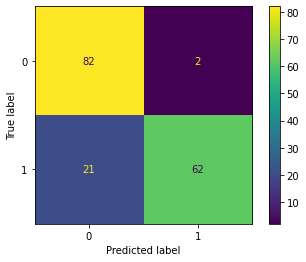

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc,X_test,y_test)

**Handling Class Imbalance**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({1: 416, 0: 167})
Resample dataset shape Counter({1: 416, 0: 416})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42, stratify=y_ros)

## **Building Model: Random Forest Classifier**
First, we need to import our model - Random Forest Classifier (again, using the sklearn library).

Then we would feed the model both with the data (X_train) and the answers for that data (y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier   # import the model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)           # Training the model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### **Evaluate the model**
Now we have a model. Let's evaulate it with using the accuracy_score function. This output of the function is the number of right answers (i.e. the patient who has actually the liver disease were predicted by the model as having liver disease)

In [ ]:
print(classification_report(y_test,rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        84
           1       0.97      0.75      0.84        83

    accuracy                           0.86       167
   macro avg       0.88      0.86      0.86       167
weighted avg       0.88      0.86      0.86       167



The large difference between the training score and the test score suggests that our model overfits. That is, instead of learning general rules that can be applied on unseen data, it does something that is more similar to memorize the training data. So our model performs really well on the training data (100% accuracy) but not remotely as well on the test data.

**Using Boosting model**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        84
           1       0.95      0.70      0.81        83

    accuracy                           0.83       167
   macro avg       0.86      0.83      0.83       167
weighted avg       0.86      0.83      0.83       167



**Hyperparameter Tuning**

*RandomizedSearchCV*

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
gbc = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 100, 150, 250],
    'max_depth': [2, 3, 4, 8, 16, 32, None],
    'learning_rate': [0.03, 0.1, 0.3, 1]
}
rs = RandomizedSearchCV(gbc, parameters, cv=5,n_iter=20)
rs.fit(X_train, y_train)

print_results(rs)

BEST PARAMS: {'n_estimators': 250, 'max_depth': 16, 'learning_rate': 0.03}

0.806 (+/-0.055) for {'n_estimators': 250, 'max_depth': 16, 'learning_rate': 0.03}
0.786 (+/-0.02) for {'n_estimators': 50, 'max_depth': None, 'learning_rate': 1}
0.789 (+/-0.048) for {'n_estimators': 5, 'max_depth': 32, 'learning_rate': 0.03}
0.786 (+/-0.076) for {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}
0.794 (+/-0.051) for {'n_estimators': 150, 'max_depth': None, 'learning_rate': 0.3}
0.786 (+/-0.05) for {'n_estimators': 150, 'max_depth': None, 'learning_rate': 0.03}
0.702 (+/-0.031) for {'n_estimators': 5, 'max_depth': 4, 'learning_rate': 0.03}
0.719 (+/-0.077) for {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.03}
0.792 (+/-0.049) for {'n_estimators': 250, 'max_depth': None, 'learning_rate': 0.1}
0.711 (+/-0.078) for {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.03}
0.789 (+/-0.025) for {'n_estimators': 5, 'max_depth': None, 'learning_rate': 0.3}
0.788 (+/-0.064) for {

*GridSearchCV*

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
gbc = GradientBoostingClassifier()
parameters = {
    'n_estimators': [80, 90, 100, 125, 150],
    'max_depth': [2,3,4,5,8,16,None],
    'learning_rate': [0.03, 0.1, 0.3, 0.5]
}
cv = GridSearchCV(gbc, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 80}

0.699 (+/-0.045) for {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 80}
0.707 (+/-0.048) for {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 90}
0.711 (+/-0.078) for {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 100}
0.717 (+/-0.09) for {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 125}
0.717 (+/-0.082) for {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 150}
0.723 (+/-0.077) for {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 80}
0.731 (+/-0.065) for {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 90}
0.729 (+/-0.065) for {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 100}
0.738 (+/-0.041) for {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 125}
0.744 (+/-0.034) for {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 150}
0.746 (+/-0.029) for {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 80}
0.747 (+/-0.042) for {'learning

In [ ]:
cv.best_score_

0.819548872180451

In [ ]:
print(cv.best_estimator_)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
cv.best_score_

0.819548872180451